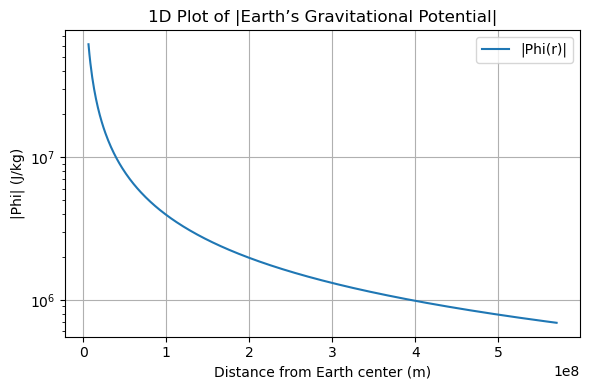

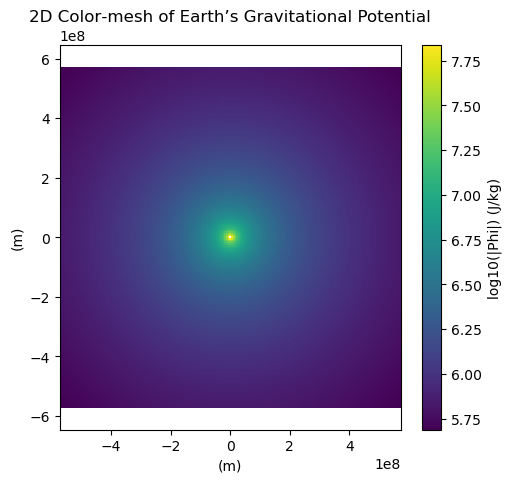

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67e-11    
M_earth = 5.9e24  
R_earth = 6.378e6  
d_earth_moon = 3.8e8  

# 1)
def gravitational_potential(M, xM, yM, x, y):
    
    dx = x - xM
    dy = y - yM
    r = np.hypot(dx, dy)
    if r == 0:
        return float('inf')
    return -G * M / r

# 2)
def plot_1D_potential():
    r_min = R_earth
    r_max = 1.5 * d_earth_moon
    num_points = 500
    rvals = np.linspace(r_min, r_max, num_points)
    pot_vals = []
    
    for r in rvals:
        pot = gravitational_potential(M_earth, 0.0, 0.0, r, 0.0)
        pot_vals.append(abs(pot))
    
    plt.figure(figsize=(6,4))
    plt.plot(rvals, pot_vals, label='|Phi(r)|')
    plt.yscale('log')
    plt.xlabel('Distance from Earth center (m)')
    plt.ylabel('|Phi| (J/kg)')
    plt.title('1D Plot of |Earth’s Gravitational Potential|')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_2D_potential():
    
    grid_size = 201
    xy_max = 1.5 * d_earth_moon
    
    xvals = np.linspace(-xy_max, xy_max, grid_size)
    yvals = np.linspace(-xy_max, xy_max, grid_size)
    X, Y = np.meshgrid(xvals, yvals)

    pot_grid = np.zeros_like(X, dtype=float)
    for i in range(grid_size):
        for j in range(grid_size):
            pot_grid[i, j] = gravitational_potential(M_earth, 0.0, 0.0, X[i,j], Y[i,j])

    plt.figure(figsize=(5.5,5))
    plt.title('2D Color‐mesh of Earth’s Gravitational Potential')
    plt.xlabel('(m)')
    plt.ylabel('(m)')
    plt.axis('equal')

    valid_mask = (pot_grid != 0.0)
    log_vals = np.full_like(pot_grid, np.nan, dtype=float)
    log_vals[valid_mask] = np.log10(np.abs(pot_grid[valid_mask]))
    
    cplot = plt.pcolormesh(X, Y, log_vals, shading='auto')
    cbar = plt.colorbar(cplot)
    cbar.set_label('log10(|Phi|) (J/kg)')
    
    plt.show()

if __name__ == "__main__":
    plot_1D_potential()
    plot_2D_potential()
